<a href="https://colab.research.google.com/github/Pornwalaifoxall/bsc_dpdm24/blob/main/Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

In [45]:
import pandas as pd
import os

In [46]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/BSC_DPDM24_DATA'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
train_set = pd.read_csv(os.path.join(path,'train_set.csv'),encoding='latin-1')
X_test = pd.read_csv(os.path.join(path,'X_test.csv'),encoding='latin-1')
y_pred_beseline = pd.read_csv(os.path.join(path,'y_pred_baseline.csv'),encoding='latin-1')

In [48]:
train_set.head()

,id number,Xn,Hb(Gm%),Hct(%),MCV(fl),A2 (2-3%),HbF (2%),HbA (95-97%),RBC,MCH,MCHC,MCV-RBC-3*HGB,MCV-RBC-5*HGB,|80-MCV|,|27-MCH|,|80-MCV|*|27-MCH|,Thal_Group
0,67d169,25.0,11.1,34.0,78.0,3.2,0.0,55.9,4.358974,25.464706,32.647059,40.341026,18.141026,2.0,1.535294,3.070588,Abnormal_variants
1,67l168,32.0,13.9,42.0,86.0,3.7,0.3,54.8,5.197674,28.859060,33.557047,35.802326,5.802326,6.0,1.859060,11.154362,Abnormal_variants
2,67i267,43.0,10.1,31.0,78.0,2.6,0.3,56.2,3.974359,25.412903,32.580645,43.725641,23.525641,2.0,1.587097,3.174194,Abnormal_variants
3,67e248,33.0,12.9,38.0,76.0,3.0,0.2,61.2,5.000000,25.800000,33.947368,32.300000,6.500000,4.0,1.200000,4.800000,Abnormal_variants
4,67h277,23.0,12.9,40.0,78.0,3.1,0.0,55.6,5.128205,25.155000,32.250000,34.171795,8.371795,2.0,1.845000,3.690000,Abnormal_variants


In [49]:
y_pred_beseline.head()

,Thal_Group
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal


In [50]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id number          4322 non-null   object 
 1   Xn                 3887 non-null   float64
 2   Hb(Gm%)            4315 non-null   float64
 3   Hct(%)             4315 non-null   float64
 4   MCV(fl)            4315 non-null   float64
 5   A2 (2-3%)          4189 non-null   float64
 6   HbF (2%)           4206 non-null   float64
 7   HbA (95-97%)       4206 non-null   float64
 8   RBC                4315 non-null   float64
 9   MCH                4315 non-null   float64
 10  MCHC               4315 non-null   float64
 11  MCV-RBC-3*HGB      4315 non-null   float64
 12  MCV-RBC-5*HGB      4315 non-null   float64
 13  |80-MCV|           4315 non-null   float64
 14  |27-MCH|           4315 non-null   float64
 15  |80-MCV|*|27-MCH|  4315 non-null   float64
 16  Thal_Group         4322 

### ตรวจสอบค่า Missing ของ Train_set

In [51]:
train_set.isnull().any()

,0
id number,False
Xn,True
Hb(Gm%),True
Hct(%),True
MCV(fl),True
A2 (2-3%),True
HbF (2%),True
HbA (95-97%),True
RBC,True
MCH,True


เติมค่า missing ด้วยค่าเฉลี่ย

In [52]:
# เติมค่าที่หายไปด้วยค่าเฉลี่ย (ถ้ามี) สำหรับคอลัมน์ที่เป็นตัวเลขเท่านั้น
# Group data by 'Thal_Group' and calculate the mean of specified columns
grouped_data = train_set.groupby('Thal_Group').agg({
    'Xn': 'mean',
    'Hb(Gm%)': 'mean',
    'Hct(%)': 'mean',
    'MCV(fl)': 'mean',
    'A2 (2-3%)': 'mean',
    'HbF (2%)': 'mean',
    'HbA (95-97%)': 'mean',
    'RBC': 'mean',
    'MCH': 'mean',
    'MCHC': 'mean',
    'MCV-RBC-3*HGB': 'mean',
    'MCV-RBC-5*HGB': 'mean',
    '|80-MCV|': 'mean',
    '|27-MCH|': 'mean',
    '|80-MCV|*|27-MCH|': 'mean'
}).reset_index()

# Fill missing values with the mean for each Thal_Group
for col in ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)', 'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB', 'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']:
    train_set[col] = train_set.groupby('Thal_Group')[col].transform(lambda x: x.fillna(x.mean()))
grouped_data

,Thal_Group,Xn,Hb(Gm%),Hct(%),MCV(fl),A2 (2-3%),HbF (2%),HbA (95-97%),RBC,MCH,MCHC,MCV-RBC-3*HGB,MCV-RBC-5*HGB,|80-MCV|,|27-MCH|,|80-MCV|*|27-MCH|
0,Abnormal_variants,40.529412,11.105556,33.650000,79.625000,3.227778,0.188889,56.566667,4.240138,26.412996,33.004988,42.204306,19.870973,3.652778,1.750514,6.349985
1,Alpha_thal_related,41.330254,9.530366,30.960775,63.160471,6.374747,2.888781,83.691759,4.957425,19.405597,30.799821,29.253615,10.083931,16.859948,7.595370,137.702169
2,Beta_thal_related,46.324937,9.790970,31.048630,63.642123,5.626389,3.213076,84.590323,4.900895,20.054667,31.505074,29.335586,9.754587,16.444635,6.957507,118.613234
3,Complex_genotypes,32.666667,9.933333,31.666667,67.000000,21.166667,4.666667,70.433333,4.712341,20.945055,31.245421,32.487659,12.620993,13.000000,6.054945,80.061538
4,HbE_related,35.488960,11.333333,34.428353,72.130499,34.582174,1.440010,57.062782,4.821328,23.737376,32.855755,33.086737,10.338851,8.569892,3.408531,53.034388
5,Normal,41.553550,10.402556,32.443184,75.824814,2.610992,0.449891,90.748540,4.312072,24.290406,31.922800,40.048053,19.171919,5.849308,3.100567,40.722298


### X_test

In [53]:
X_test.head()

,id number,Xn,Hb(Gm%),Hct(%),MCV(fl),A2 (2-3%),HbF (2%),HbA (95-97%),RBC,MCH,MCHC,MCV-RBC-3*HGB,MCV-RBC-5*HGB,|80-MCV|,|27-MCH|,|80-MCV|*|27-MCH|
0,66z133,38.0,12.4,37.0,78.0,2.7,1.3,75.4,4.743590,26.140541,33.513514,36.056410,11.256410,2.0,0.859459,1.718919
1,66z297,28.0,12.8,39.4,82.0,2.7,0.0,97.3,4.804878,26.639594,32.487310,38.795122,13.195122,2.0,0.360406,0.720812
2,66u491,78.0,10.9,33.9,79.0,3.1,0.0,96.9,4.291139,25.401180,32.153392,42.008861,20.208861,1.0,1.598820,1.598820
3,66x072,65.0,10.9,33.9,79.0,3.0,0.2,87.9,4.291139,25.401180,32.153392,42.008861,20.208861,1.0,1.598820,1.598820
4,67m031,17.0,11.5,36.0,78.0,2.8,0.8,79.6,4.615385,24.916667,31.944444,38.884615,15.884615,2.0,2.083333,4.166667


In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id number          1997 non-null   object 
 1   Xn                 1810 non-null   float64
 2   Hb(Gm%)            1995 non-null   float64
 3   Hct(%)             1995 non-null   float64
 4   MCV(fl)            1996 non-null   float64
 5   A2 (2-3%)          1935 non-null   float64
 6   HbF (2%)           1938 non-null   float64
 7   HbA (95-97%)       1938 non-null   float64
 8   RBC                1995 non-null   float64
 9   MCH                1995 non-null   float64
 10  MCHC               1995 non-null   float64
 11  MCV-RBC-3*HGB      1995 non-null   float64
 12  MCV-RBC-5*HGB      1995 non-null   float64
 13  |80-MCV|           1996 non-null   float64
 14  |27-MCH|           1995 non-null   float64
 15  |80-MCV|*|27-MCH|  1995 non-null   float64
dtypes: float64(15), object(1

เติมค่าเฉลี่ยลงในค่าที่ว่าง

In [55]:
### เติมค่าเฉลี่ยลงในค่า missing
for col in X_test.columns:
  if X_test[col].isnull().any():
    mean_value = X_test[col].mean()
    X_test[col].fillna(mean_value, inplace=True)

<ipython-input-55-56e60e348b60>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test[col].fillna(mean_value, inplace=True)


ลบคอลลัมน์ที่ไม่น่าจะใช้ในการสร้าง Model

In [56]:
train_set = train_set.drop(columns=['id number'])

In [57]:
train_set

,Xn,Hb(Gm%),Hct(%),MCV(fl),A2 (2-3%),HbF (2%),HbA (95-97%),RBC,MCH,MCHC,MCV-RBC-3*HGB,MCV-RBC-5*HGB,|80-MCV|,|27-MCH|,|80-MCV|*|27-MCH|,Thal_Group
0,25.0,11.1,34.0,78.0,3.2,0.0,55.9,4.358974,25.464706,32.647059,40.341026,18.141026,2.0,1.535294,3.070588,Abnormal_variants
1,32.0,13.9,42.0,86.0,3.7,0.3,54.8,5.197674,28.859060,33.557047,35.802326,5.802326,6.0,1.859060,11.154362,Abnormal_variants
2,43.0,10.1,31.0,78.0,2.6,0.3,56.2,3.974359,25.412903,32.580645,43.725641,23.525641,2.0,1.587097,3.174194,Abnormal_variants
3,33.0,12.9,38.0,76.0,3.0,0.2,61.2,5.000000,25.800000,33.947368,32.300000,6.500000,4.0,1.200000,4.800000,Abnormal_variants
4,23.0,12.9,40.0,78.0,3.1,0.0,55.6,5.128205,25.155000,32.250000,34.171795,8.371795,2.0,1.845000,3.690000,Abnormal_variants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,63.0,10.1,31.0,83.0,2.8,1.8,84.2,3.734940,27.041935,32.580645,48.965060,28.765060,3.0,0.041935,0.125806,Normal
4318,19.0,11.1,34.0,79.0,2.6,0.6,78.0,4.303797,25.791176,32.647059,41.396203,19.196203,1.0,1.208824,1.208824,Normal
4319,80.0,10.9,33.9,79.0,3.0,0.2,87.2,4.291139,25.401180,32.153392,42.008861,20.208861,1.0,1.598820,1.598820,Normal
4320,27.0,13.2,41.4,87.0,2.9,0.3,87.6,4.758621,27.739130,31.884058,42.641379,16.241379,7.0,0.739130,5.173913,Normal


แปลงคอลลัมน์เป็นตัวเลข โดยใช้วิธี One-hot Encoding

In [58]:
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder # Import the LabelEncoder class

label_encoder = LabelEncoder()
train_set["Thal_Group"] = label_encoder.fit_transform(train_set["Thal_Group"])

# 🔍 ดูค่าที่ถูก encode
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'Abnormal_variants': 0, 'Alpha_thal_related': 1, 'Beta_thal_related': 2, 'Complex_genotypes': 3, 'HbE_related': 4, 'Normal': 5}


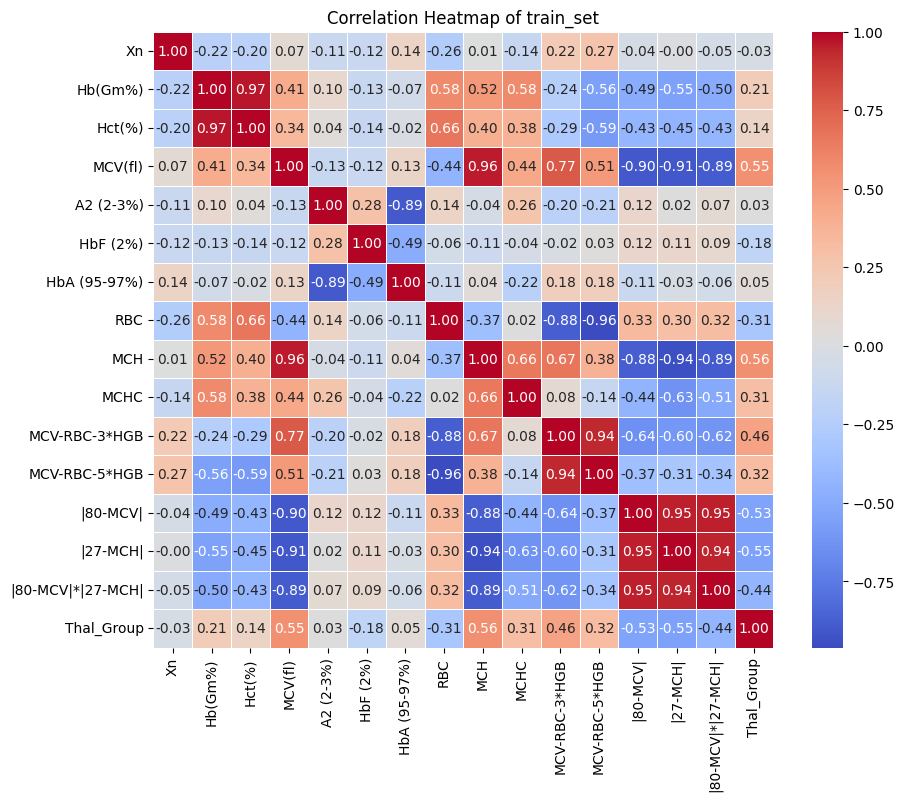

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณ correlation matrix
heatmap = train_set.corr()

# สร้าง heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of train_set')
plt.show()

In [60]:
# ลบคอลัมน์ที่ไม่ต้องการออกจาก X_test
X_test = X_test.drop(columns=['id number'], axis=1)

# ตรวจสอบคอลัมน์หลังจากลบ
print(X_test.columns)

Index(['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
       'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB', 'MCV-RBC-5*HGB',
       '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|'],
      dtype='object')


แยก Features และ Target

In [61]:
from sklearn.model_selection import train_test_split
# แยก Features (`X`) และ Target (`y`)
X = train_set.drop(columns=["Thal_Group"])  # ลบ Target ออกจาก Features
y = train_set["Thal_Group"]

# แยกชุด Train-Test (80% Train / 20% Validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ทำ Standardization (ปรับขนาดข้อมูล)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

เปรียบเทียบโมเดลแต่ละตัว

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

In [69]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)  # เพิ่ม XGBoost
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f"🔹 Model: {name}")
    print(classification_report(y_test, y_pred))
    print("=" * 50)

# 📊 แสดงผลลัพธ์เป็น DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1 Score', ascending=False))

🔹 Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.84      0.90      0.87       192
           2       0.97      0.98      0.97        88
           4       0.99      0.99      0.99       205
           5       0.96      0.92      0.94       376

    accuracy                           0.94       865
   macro avg       0.95      0.91      0.92       865
weighted avg       0.94      0.94      0.94       865

🔹 Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.53      0.77      0.63       192
           2       0.35      0.10      0.16        88
           4       0.98      0.97      0.97       205
           5       0.91      0.86      0.89       376

    accuracy                           0.79       865
   macro avg       0.75      0.69      0.70       865
weighted avg       0.79  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

🔹 Model: XGBoost
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.85      0.88      0.87       192
           2       0.98      1.00      0.99        88
           4       0.99      0.99      0.99       205
           5       0.95      0.93      0.94       376

    accuracy                           0.94       865
   macro avg       0.95      0.91      0.93       865
weighted avg       0.94      0.94      0.94       865

                    Model  Accuracy    Recall  F1 Score
5                 XGBoost  0.937572  0.909197  0.927178
0           Random Forest  0.937572  0.907244  0.924905
4     K-Nearest Neighbors  0.875145  0.731741  0.764259
3           Decision Tree  0.916763  0.743247  0.760263
1     Logistic Regression  0.788439  0.690132  0.700400
2  Support Vector Machine  0.882081  0.677217  0.685654


โมเดลที่ใช้คือ XGBoost

เลือกโมเดลที่ดีที่สุด และทำนายผลบน X_test

In [65]:
# ใช้โมเดลที่มี F1 Score สูงสุด
best_model_name = results_df.sort_values(by='F1 Score', ascending=False).iloc[0]['Model']
best_model = models[best_model_name]

# ฝึกโมเดลใหม่โดยใช้ข้อมูล train_set ทั้งหมด
best_model.fit(X_train_scaled, y_train)

# ทำนายผลบน X_test
y_test_pred = best_model.predict(X_test_scaled)

# แปลงผลลัพธ์กลับเป็นข้อความ
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred)

# 📥 บันทึกผลลัพธ์ลงไฟล์ CSV ตามรูปแบบของ y_pred_baseline.csv
submission = pd.DataFrame({'Thal_Group': y_test_pred_labels})
submission.to_csv('/content/drive/MyDrive/BSC_DPDM24_DATA/y_test_predictions.csv', index=False)

print(f"✅ บันทึกผลลัพธ์เสร็จสิ้น! ไฟล์: y_test_predictions.csv")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:46:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ บันทึกผลลัพธ์เสร็จสิ้น! ไฟล์: y_test_predictions.csv
